In [1]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<center><h1> MCD - Ciencia de Datos Responsable </h1><center>
<center><h2> Tarea 3: Modelos interpretables y xAI <h2><center>    

    
## Instrucciones:

- La siguiente tarea es **individual**.
- La calificación de esta tarea se hará de forma **manual**, es decir, esta tarea no cuenta con test cases automáticos. Es por esto que al hacer entrega de su tarea podrá ver una calificación de "0%" y "Aprobado", independiente del contenido de su notebook.
- Cuenta con intentos ilimitados para el envío de su tarea.
- Ante cualquier duda o consulta pueden comunicarse a través de Foros o Salesforce.

In [2]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


### Pregunta 1: Preprocese los datos de Census Income Dataset. Luego, entrene un árbol de decisión y evalúe este modelo desde la perspectiva de la interpretabilidad global. Utilice tanto tree_plot como un gráfico de la importancia de las features (3 ptos).

**Instrucciones adicionales:**

- Haga uso de los métodos que le provee el mismo modelo (intrinsicamente interpretable).


# PREGUNTA 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   education       45222 non-null  object 
 3   education-num   45222 non-null  float64
 4   marital-status  45222 non-null  object 
 5   occupation      45222 non-null  object 
 6   relationship    45222 non-null  object 
 7   race            45222 non-null  object 
 8   sex             45222 non-null  object 
 9   capital-gain    45222 non-null  float64
 10  capital-loss    45222 non-null  float64
 11  hours-per-week  45222 non-null  float64
 12  native-country  45222 non-null  object 
 13  income          45222 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.8+ MB


In [4]:
# Haremos el arbol de decision de nuevo, pero eliminaremos algunas columnas de df para ver si el arbol cambia 
dataset = df.copy()
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [5]:
dataset = dataset.drop(['education', 'native-country', 'workclass', 'occupation', 'race', 'sex',], axis=1)

In [6]:
dataset.head()

,age,education-num,marital-status,relationship,capital-gain,capital-loss,hours-per-week,income
0,25.0,7.0,Never-married,Own-child,0.0,0.0,40.0,<=50K
1,38.0,9.0,Married-civ-spouse,Husband,0.0,0.0,50.0,<=50K
2,28.0,12.0,Married-civ-spouse,Husband,0.0,0.0,40.0,>50K
3,44.0,10.0,Married-civ-spouse,Husband,7688.0,0.0,40.0,>50K
4,34.0,6.0,Never-married,Not-in-family,0.0,0.0,30.0,<=50K


In [7]:
# Con estos datos eliminados, volvemos a entrenar el modelo y a visualizar el arbol de decision 
X = dataset.drop('income', axis=1)
y = dataset['income']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sin normalizacion
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

print('Test score: ', model_2.score(X_test, y_test))



Test score:  0.8325041459369817


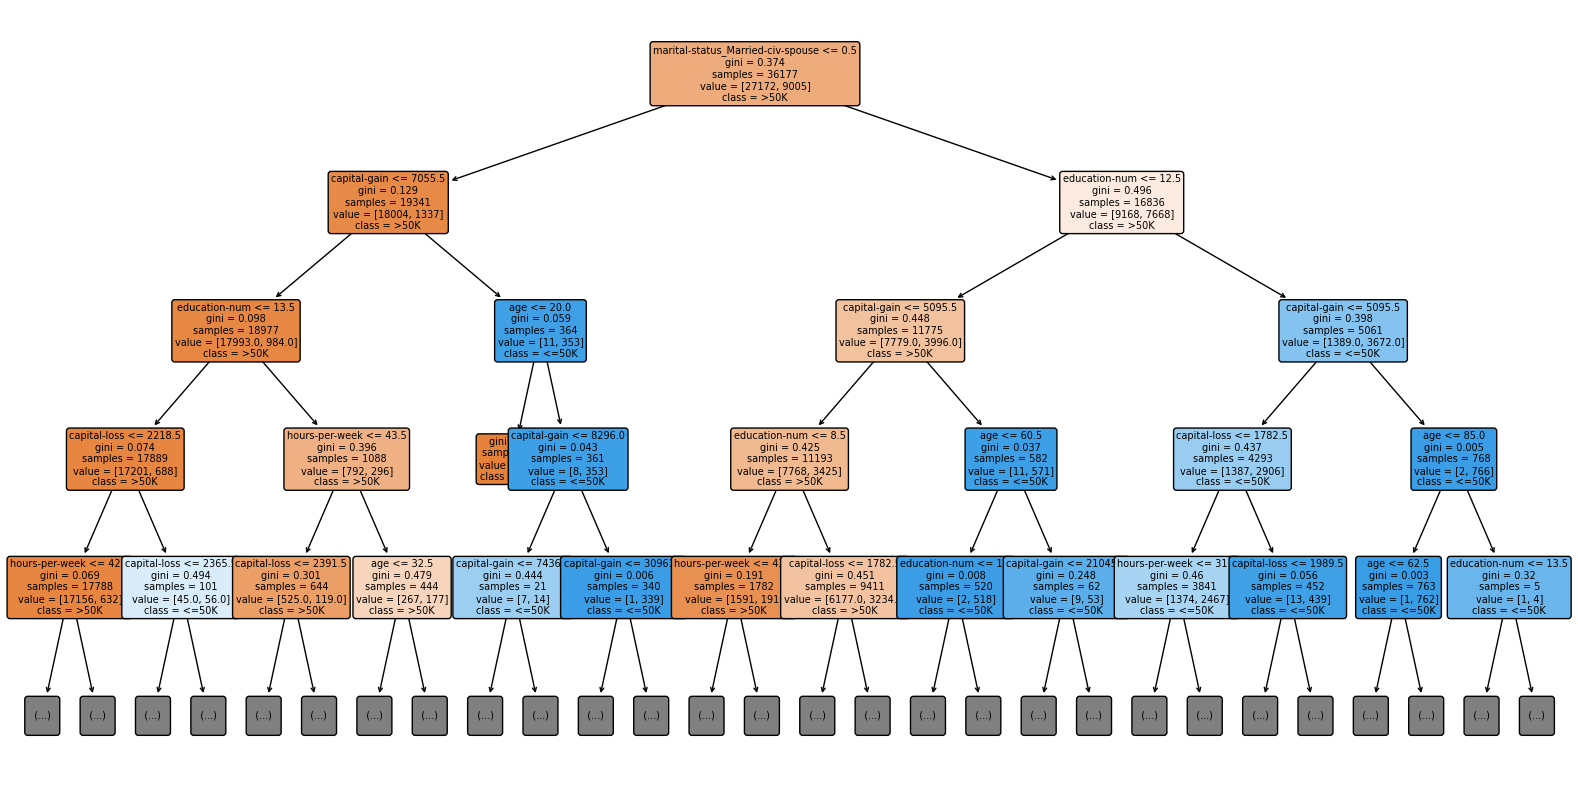

In [17]:
# Arbol de decision graficado
plt.figure(figsize=(20, 10))
plot_tree(model_2, filled=True, rounded = True, feature_names=X.columns, max_depth=4, class_names =[">50K", "<=50K"], fontsize=7)
plt.show()


In [9]:
model_2.feature_importances_

array([0.16283839, 0.18367639, 0.16133215, 0.05995818, 0.11352027,
       0.00421707, 0.00055839, 0.28066839, 0.00131153, 0.00375071,
       0.00237324, 0.00148482, 0.00608441, 0.00340968, 0.00311935,
       0.00229518, 0.00220911, 0.00719273])

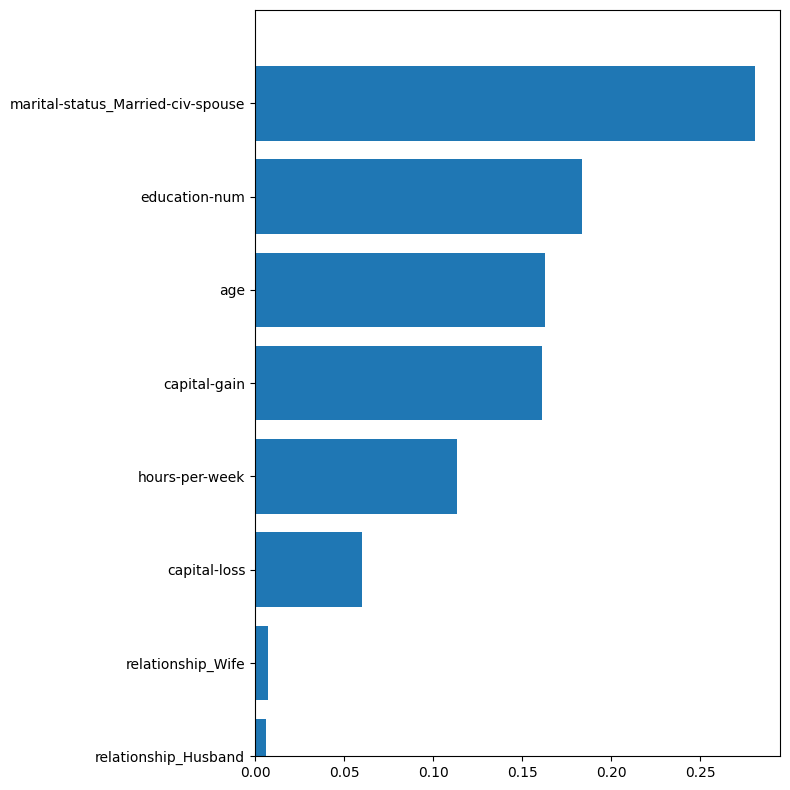

In [10]:
# Visualizacion del feature importance
importance_sorted_idx = np.argsort(model_2.feature_importances_)
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.barh(range(0, 8), model_2.feature_importances_[importance_sorted_idx][-8:], height=0.8)
ax.set_yticks(range(0, 8))
ax.set_yticklabels(X.columns[importance_sorted_idx][-8:])
ax.set_ylim((0, len(model_2.feature_importances_[-8:])))
fig.tight_layout()
plt.show()



En este grafico estan los 8 atributos que provocan la mayor disminucion del gini score.

### Pregunta 2: Entrene otro modelo (que no sea interpretable) y realice el procedimiento necesario para obtener explicabilidad local de este modelo utilizando LIME. Obtenga las explicaciones para las predicciones de 3 registros de los datos de entrenamiento. Comente sus resultados (3 ptos).

**Instrucciones adicionales:**

- Recuerde el uso de LabelEncoder en el pre-procesamiento de sus datos.